In [6]:
import os
import numpy as np
import torch
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

SEED = 0
np.random.seed(SEED)
torch.manual_seed(SEED)

ARTIFACT_DIR = "artifacts"
IMG_DIR = "images"
os.makedirs(IMG_DIR, exist_ok=True)

In [7]:
X_test = np.load(os.path.join(ARTIFACT_DIR, "X_test.npy"))
T_test = np.load(os.path.join(ARTIFACT_DIR, "T_test.npy"))

scaler_t = joblib.load(os.path.join(ARTIFACT_DIR, "scaler_t.pkl"))

print("X_test:", X_test.shape)

X_test: (95, 10)


In [8]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, input_dim, output_dim=3):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.drop1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.drop2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(32, output_dim)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.drop1(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.drop2(x)
        return self.fc3(x)

In [9]:
net = Net(input_dim=X_test.shape[1], output_dim=3)
net.load_state_dict(torch.load(os.path.join(ARTIFACT_DIR, "model.pth"), map_location="cpu"))
net.eval()

with torch.no_grad():
    y_pred_std = net(torch.tensor(X_test, dtype=torch.float32)).numpy()

y_true_std = T_test

In [10]:
y_true = scaler_t.inverse_transform(y_true_std)
y_pred = scaler_t.inverse_transform(y_pred_std)

In [11]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

names = ["収縮期血圧", "拡張期血圧", "脈拍"]

for i, name in enumerate(names):
    print("-----", name, "-----")
    print("RMSE:", rmse(y_true[:, i], y_pred[:, i]))
    print("MAE :", mean_absolute_error(y_true[:, i], y_pred[:, i]))
    print("R2  :", r2_score(y_true[:, i], y_pred[:, i]))

----- 収縮期血圧 -----
RMSE: 27.850997101554213
MAE : 22.774147033691406
R2  : -0.08671402931213379
----- 拡張期血圧 -----
RMSE: 14.165277091297655
MAE : 11.554277420043945
R2  : -0.08015143871307373
----- 脈拍 -----
RMSE: 3.3529327365898935
MAE : 2.7163760662078857
R2  : -0.012501358985900879


/tmp/ipython-input-1629866313.py:10: UserWarning: Glyph 21454 (\N{CJK UNIFIED IDEOGRAPH-53CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1629866313.py:10: UserWarning: Glyph 32302 (\N{CJK UNIFIED IDEOGRAPH-7E2E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1629866313.py:10: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1629866313.py:10: UserWarning: Glyph 34880 (\N{CJK UNIFIED IDEOGRAPH-8840}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1629866313.py:10: UserWarning: Glyph 22311 (\N{CJK UNIFIED IDEOGRAPH-5727}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1629866313.py:11: UserWarning: Glyph 21454 (\N{CJK UNIFIED IDEOGRAPH-53CE}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(IMG_DIR, f"{name}_scatter.png"))
/tmp/ipython-input-1629866313.py:11: UserWarning: Glyph 32302

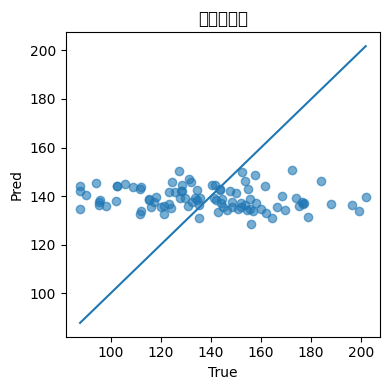

/tmp/ipython-input-1629866313.py:10: UserWarning: Glyph 25313 (\N{CJK UNIFIED IDEOGRAPH-62E1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1629866313.py:10: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1629866313.py:11: UserWarning: Glyph 25313 (\N{CJK UNIFIED IDEOGRAPH-62E1}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(IMG_DIR, f"{name}_scatter.png"))
/tmp/ipython-input-1629866313.py:11: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(IMG_DIR, f"{name}_scatter.png"))
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25313 (\N{CJK UNIFIED IDEOGRAPH-62E1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDE

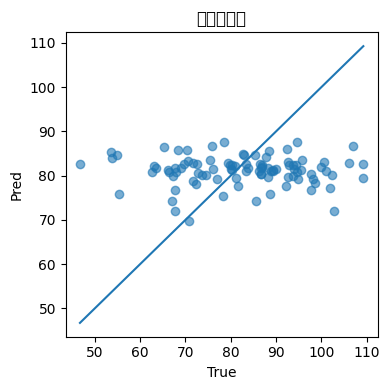

/tmp/ipython-input-1629866313.py:10: UserWarning: Glyph 33032 (\N{CJK UNIFIED IDEOGRAPH-8108}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1629866313.py:10: UserWarning: Glyph 25293 (\N{CJK UNIFIED IDEOGRAPH-62CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1629866313.py:11: UserWarning: Glyph 33032 (\N{CJK UNIFIED IDEOGRAPH-8108}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(IMG_DIR, f"{name}_scatter.png"))
/tmp/ipython-input-1629866313.py:11: UserWarning: Glyph 25293 (\N{CJK UNIFIED IDEOGRAPH-62CD}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(IMG_DIR, f"{name}_scatter.png"))
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33032 (\N{CJK UNIFIED IDEOGRAPH-8108}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25293 (\N{CJK UNIFIED IDE

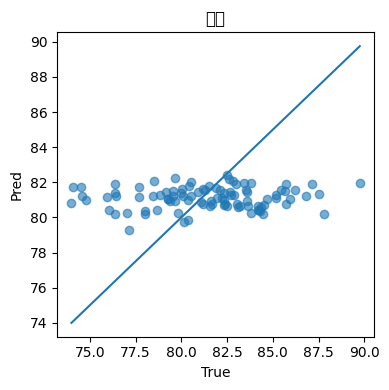

In [12]:
for i, name in enumerate(names):
    plt.figure(figsize=(4,4))
    plt.scatter(y_true[:, i], y_pred[:, i], alpha=0.6)
    mn = min(y_true[:, i].min(), y_pred[:, i].min())
    mx = max(y_true[:, i].max(), y_pred[:, i].max())
    plt.plot([mn, mx], [mn, mx])
    plt.title(name)
    plt.xlabel("True")
    plt.ylabel("Pred")
    plt.tight_layout()
    plt.savefig(os.path.join(IMG_DIR, f"{name}_scatter.png"))
    plt.show()

Base RMSE: 15.123068976480587


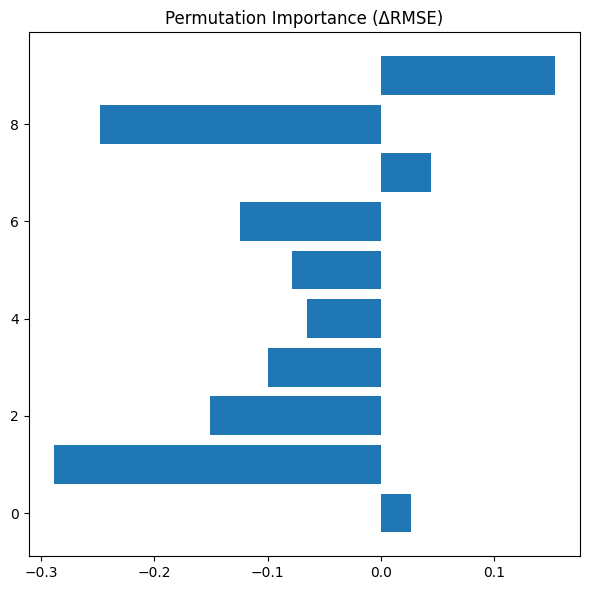

In [13]:
def rmse_multi(y_true, y_pred):
    rmses = []
    for i in range(y_true.shape[1]):
        rmses.append(np.sqrt(mean_squared_error(y_true[:, i], y_pred[:, i])))
    return np.mean(rmses)

base_rmse = rmse_multi(y_true, y_pred)
print("Base RMSE:", base_rmse)

feature_importance = []

for j in range(X_test.shape[1]):
    X_perm = X_test.copy()
    np.random.shuffle(X_perm[:, j])

    with torch.no_grad():
        pred_std = net(torch.tensor(X_perm, dtype=torch.float32)).numpy()

    pred_orig = scaler_t.inverse_transform(pred_std)
    delta = rmse_multi(y_true, pred_orig) - base_rmse
    feature_importance.append(delta)

plt.figure(figsize=(6,6))
plt.barh(range(len(feature_importance)), feature_importance)
plt.title("Permutation Importance (ΔRMSE)")
plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, "permutation_importance.png"))
plt.show()